In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Step 2: Load Dataset

import pandas as pd

# Change path to your folder
base_path = "/content/drive/MyDrive/archive (2)/"

city_day = pd.read_csv(base_path + "city_day.csv")
city_hour = pd.read_csv(base_path + "city_hour.csv")
station_hour = pd.read_csv(base_path + "station_hour.csv")
station_day = pd.read_csv(base_path + "station_day.csv")
stations = pd.read_csv(base_path + "stations.csv")

print("\ncity_day shape:", city_day.shape)
print("\n----------------------Sample city_day data:---------------------------------")
print(city_day.head())

print("\n\ncity_hour shape:", city_hour.shape)
print("\n----------------------Sample city_hour data:---------------------------------")
print(city_hour.head())

print("\n\nstation_day shape:", station_day.shape)
print("\n-----------------------Sample station_day data:------------------------------")
print(station_day.head())

print("\n\nstations shape:", stations.shape)
print("\n-----------------------Sample stations data:---------------------------------")
print(stations.head())

print("\n\nstation_hour shape:", station_hour.shape)
print("\n-----------------------Sample station_hour data:-----------------------------")
print(station_hour.head())



/tmp/ipython-input-542315362.py:10: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  station_hour = pd.read_csv(base_path + "station_hour.csv")



city_day shape: (29531, 16)

----------------------Sample city_day data:---------------------------------
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


city_hour shape: (707875, 16)

----------------------Sample city_hour data:-----

In [ ]:
# Step 3: Data Cleaning

# Convert 'Date' column to datetime
city_day['Date'] = pd.to_datetime(city_day['Date'], errors='coerce')

# Drop missing values for simplicity
city_day = city_day.dropna(subset=['Date'])

# Example: Focus on Delhi
delhi_data = city_day[city_day['City'] == 'Delhi']

print("Delhi Data Shape:", delhi_data.shape)

Delhi Data Shape: (2009, 16)


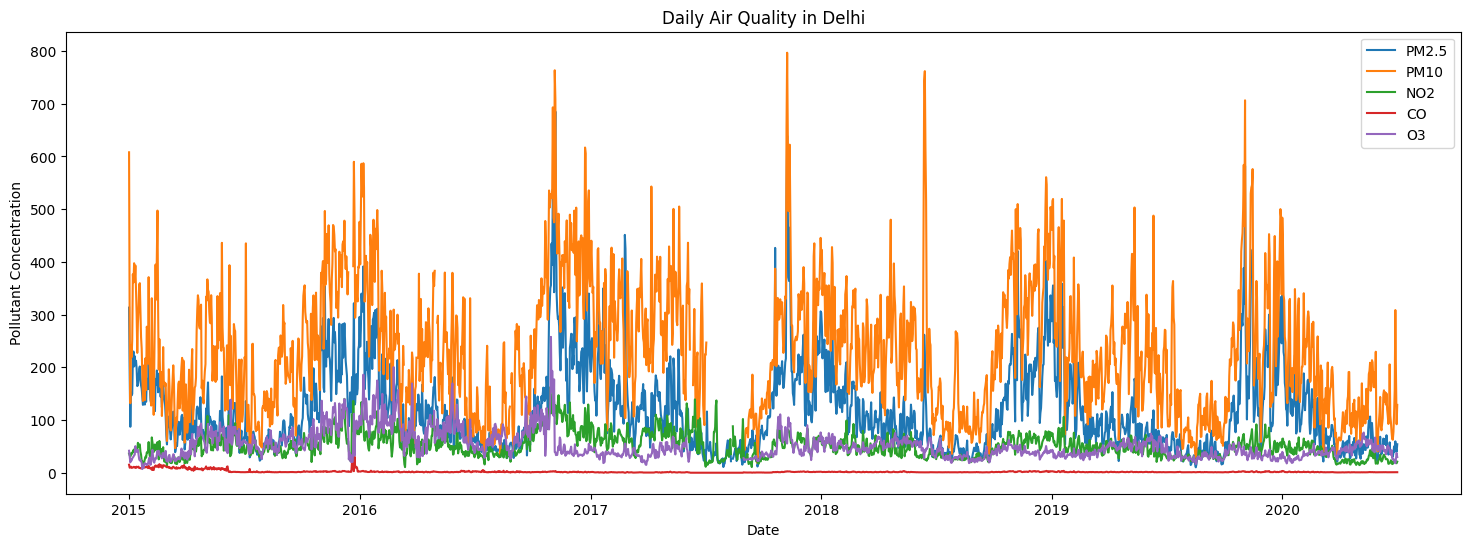

In [ ]:
# Step 4: Trend Analysis

# Pick pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']

# Daily average already provided, so just plot
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
for col in pollutants:
    if col in delhi_data.columns:
        plt.plot(delhi_data['Date'], delhi_data[col], label=col)

plt.xlabel("Date")
plt.ylabel("Pollutant Concentration")
plt.title("Daily Air Quality in Delhi")
plt.legend()
plt.show()


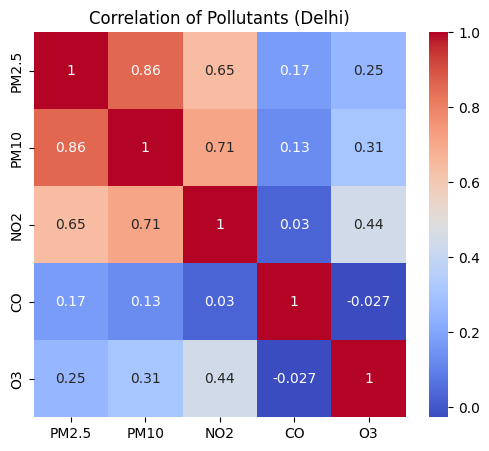

In [ ]:
# Step 5: Correlation Analysis

corr = delhi_data[pollutants].corr()
import seaborn as sns

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Pollutants (Delhi)")
plt.show()


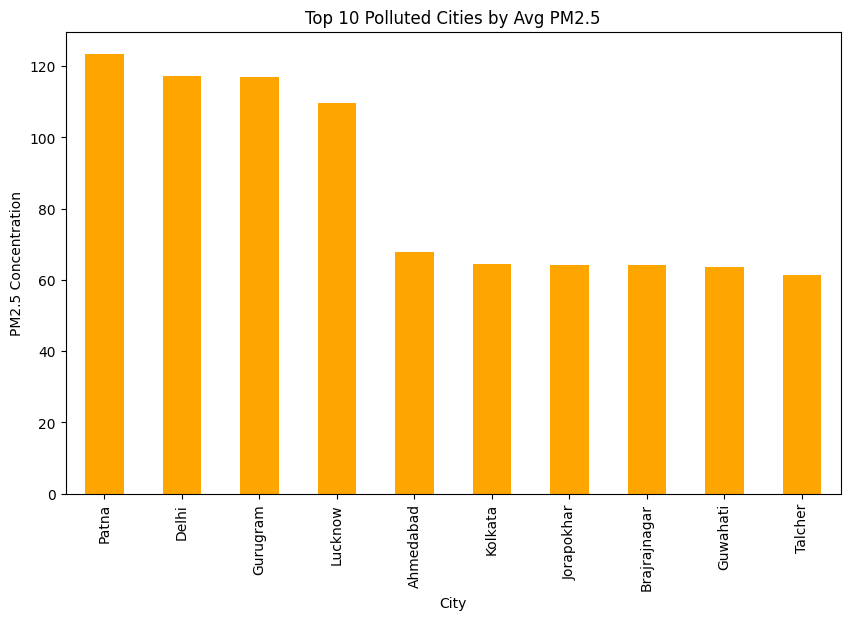

In [ ]:
# Step 6: City Comparison

# Calculate average PM2.5 across cities
city_avg_pm25 = city_day.groupby('City')['PM2.5'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
city_avg_pm25.plot(kind='bar', color='orange')
plt.title("Top 10 Polluted Cities by Avg PM2.5")
plt.ylabel("PM2.5 Concentration")
plt.show()


/tmp/ipython-input-4106602639.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Month'] = delhi_data['Date'].dt.month


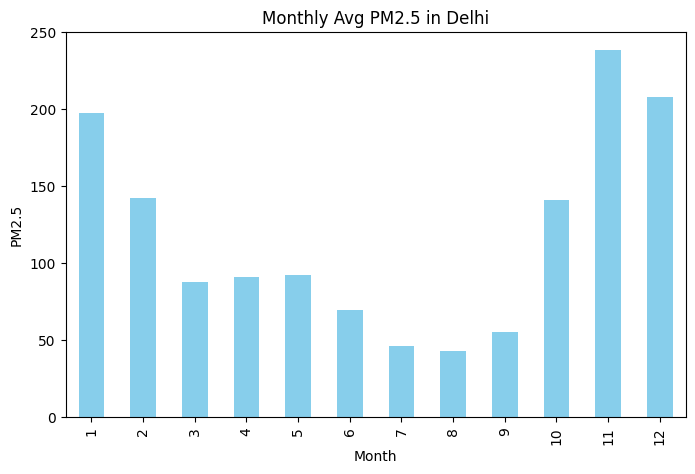

In [ ]:
# Step 7: Seasonal Analysis

# Add Month & Year columns
city_day['Month'] = city_day['Date'].dt.month
city_day['Year'] = city_day['Date'].dt.year

# Focus on Delhi
delhi_data['Month'] = delhi_data['Date'].dt.month
monthly_avg = delhi_data.groupby('Month')['PM2.5'].mean()

plt.figure(figsize=(8,5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title("Monthly Avg PM2.5 in Delhi")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.show()

In [ ]:
# Step 8: Identify Worst-Affected Days

worst_days = delhi_data.sort_values(by='PM2.5', ascending=False).head(5)
print("\nWorst 5 Air Quality Days in Delhi:")
print(worst_days[['Date','PM2.5','PM10','NO2','CO','O3']])


Worst 5 Air Quality Days in Delhi:
            Date   PM2.5    PM10     NO2    CO      O3
10904 2016-11-06  685.36  708.80  128.15  3.23   39.21
11271 2017-11-08  639.19  796.88   77.51  2.74   55.51
10903 2016-11-05  588.39  763.58  113.31  2.20   39.05
11996 2019-11-03  582.28  706.58   49.67  2.39   33.91
10900 2016-11-02  537.96  693.21  149.12  2.80  160.01


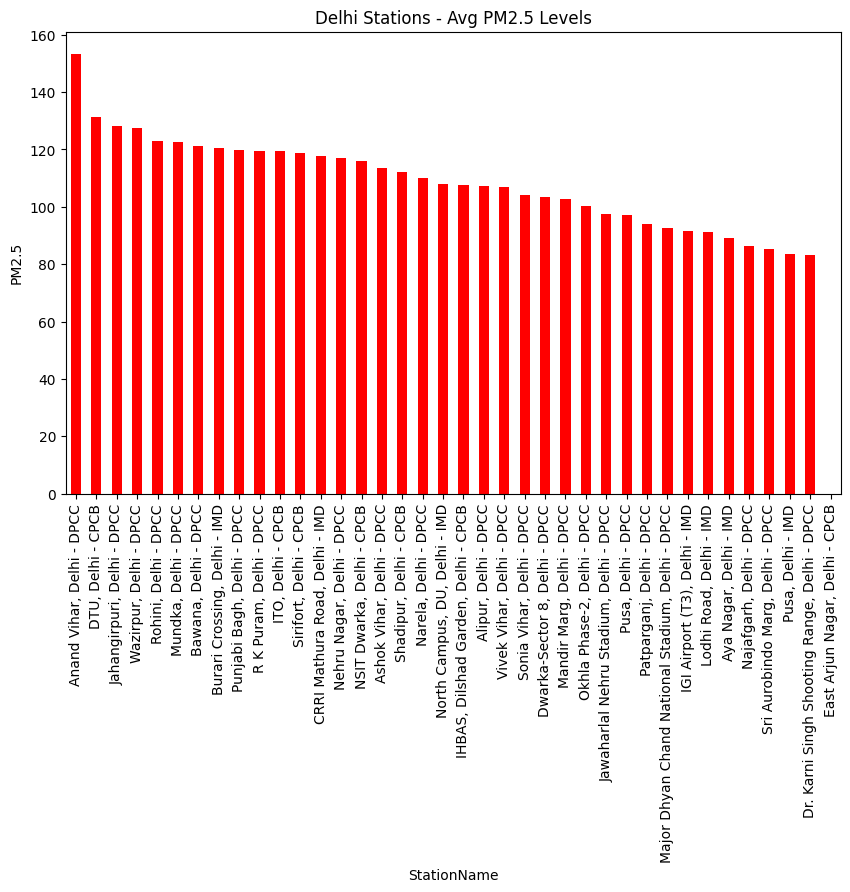

In [ ]:
# Step 9: Station-Level Analysis

# Merge station_day with station info
station_day['Date'] = pd.to_datetime(station_day['Date'], errors='coerce')
station_day = station_day.dropna(subset=['Date'])

station_day_merged = station_day.merge(stations, on='StationId')
# Example: Average PM2.5 by station in Delhi
delhi_stations = station_day_merged[station_day_merged['City']=='Delhi']
station_avg = delhi_stations.groupby('StationName')['PM2.5'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
station_avg.plot(kind='bar', color='red')
plt.title("Delhi Stations - Avg PM2.5 Levels")
plt.ylabel("PM2.5")
plt.show()